<a href="https://colab.research.google.com/github/fkvivid/DIVER/blob/main/Wheat_and_chess_board_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]


In [3]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


[Problem 1] Number of wheat on a 2 x 2 square chess board

In [4]:
small_board_ndarray = np.array([1,2**2,2**6,2**14])
#first 1
#two to right = 8
#four to lower left = 64
#eight to lower right = 16384
print("Arrange wheat on a plate of 2 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 2 squares (ndarray)：[    1     4    64 16384]


[Problem 2] Expansion to n × m mass

In [5]:
def expansion(n,m):
  z = 0;
  chessBoard = np.empty((n, m), int)
  total = 0
  for i in range(n):
    for j in range(m):
      
      chessBoard[i][j] = np.power(2, z)
      z = z + 1
      total = total + chessBoard[i][j]
  return chessBoard,total
  
ex,total = expansion(8,8)
print(ex.astype(np.uint64))

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

[Problem 3] Total number of wheat

total [2305843009213693984 4611686018427387936 9223372036854775840
                  32                  32                  32
                  32                  32]


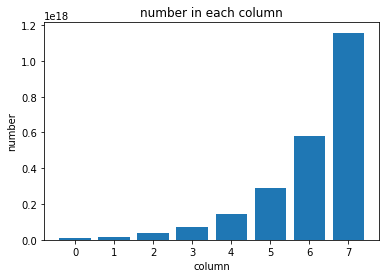

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#find total number 
lastItem = ex[-1].astype(np.uint64)
total = (lastItem+1)*32
print('total',total)

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(8),np.mean(ex.astype(np.uint64), axis=0))
plt.show()

[Problem 4] Heat map of the number of wheat

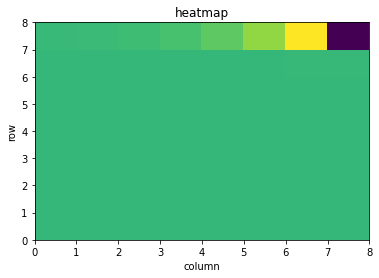

In [7]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array(ex).reshape(8, 8))
plt.show()

[Problem 5] How many times the second half is the first half

In [8]:
firstHalf, secondHalf = np.vsplit(ex.astype(np.uint64), [4])

howManyTimes =  np.sum(secondHalf)/np.sum(firstHalf)
print(howManyTimes)

4294967296.0


[Problem 6] Expansion to n × m mass by other calculation methods

In [10]:
def expansion(n,m):
  z = 0;
  chessBoard = np.empty((n, m), int)
  
  #chessBoard = [[0 for x in range(n)] for y in range(m)] 
  
  for i in range(n):
    
    Yaxis = np.empty(m,int)
    for j in range(m):
       l = np.power(2,z)
       #np.append(Yaxis,l).astype(np.uint64)
       Yaxis[j] = l
       #print(l)
       #print(z,np.power(2,z))
       
       z = z + 1
    #print(Yaxis)  
    
    np.append(chessBoard,[[2,2,2,2,2,2,2,2]],axis=0)
    #print('chess',chessBoard)
  return chessBoard


chess = expansion(8,8)

#for i in range(8):
#  print(chess[i][i])

#print(chess)

[Problem 7] Comparison of calculation time

In [11]:
%%timeit 
def expansion(n,m):
  z = 0;
  chessBoard = np.empty((n, m), int)
  
  #chessBoard = [[0 for x in range(n)] for y in range(m)] 
  
  for i in range(n):
    
    Yaxis = np.empty(m,int)
    for j in range(m):
       l = np.power(2,z)
       #np.append(Yaxis,l).astype(np.uint64)
       Yaxis[j] = l
       #print(l)
       #print(z,np.power(2,z))
       
       z = z + 1
    #print(Yaxis)  
    
    np.append(chessBoard,[[2,2,2,2,2,2,2,2]],axis=0)
    #print('chess',chessBoard)
  return chessBoard


chess = expansion(8,8)

1000 loops, best of 5: 168 µs per loop
